# Part II - (Ford Gobike Data Explanatory)
## by (Daniel A. Oladele)

## Investigation Overview
In this investigation, I wanted to look at the characteristics of trip data that could be used to predict their duration. The main focus was on the: duration, age, start/end hours, start/end weekdays, user type, and gender.

## Dataset Overview

This document explores a dataset containing the trip data of the ford gobike approximately 183,412. This data set includes information about individual rides made in a bike-sharing system covering the greater San Francisco Bay area.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb

%matplotlib inline

# suppress warnings from final output
import warnings
warnings.simplefilter("ignore")

In [2]:
# load in the dataset into a pandas dataframe
df = pd.read_csv('./fordgo_bike_tripdata_clean.csv')
df.sample(10)

,duration_sec,start_station_id,start_station_name,end_station_id,end_station_name,bike_id,user_type,member_gender,bike_share_for_all_trip,member_age,end_month,start_weekday,end_weekday,start_hour,end_hour,duration_min,distance_miles
156558,1058,350.0,8th St at Brannan St,6.0,The Embarcadero at Sansome St,5006,Subscriber,Male,No,29,February,Tue,Tue,8,8,17.633333,2.307690
3662,639,239.0,Bancroft Way at Telegraph Ave,166.0,College Ave at Alcatraz Ave,6017,Subscriber,Male,No,28,February,Thu,Thu,16,17,10.650000,1.251960
61859,1783,44.0,Civic Center/UN Plaza BART Station (Market St ...,3.0,Powell St BART Station (Market St at 4th St),1914,Subscriber,Female,No,64,February,Wed,Wed,10,11,29.716667,0.522910
9182,145,90.0,Townsend St at 7th St,67.0,San Francisco Caltrain Station 2 (Townsend St...,5933,Subscriber,Male,No,30,February,Thu,Thu,6,6,2.416667,0.550388
115883,173,44.0,Civic Center/UN Plaza BART Station (Market St ...,58.0,Market St at 10th St,5558,Subscriber,Male,No,38,February,Mon,Mon,14,15,2.883333,0.435693
155742,1005,72.0,Page St at Scott St,350.0,8th St at Brannan St,3191,Subscriber,Female,No,39,February,Tue,Tue,9,9,16.750000,1.632362
84047,272,241.0,Ashby BART Station,274.0,Oregon St at Adeline St,4754,Subscriber,Male,No,48,February,Sat,Sat,19,19,4.533333,0.380379
125402,1278,289.0,5th St at Taylor St,275.0,Julian St at 6th St,3796,Subscriber,Male,Yes,65,February,Sat,Sat,11,11,21.300000,0.675455
99146,217,238.0,MLK Jr Way at University Ave,245.0,Downtown Berkeley BART,103,Subscriber,Female,No,32,February,Thu,Thu,9,9,3.616667,0.275907
130012,857,116.0,Mississippi St at 17th St,4.0,Cyril Magnin St at Ellis St,3319,Customer,Male,No,44,February,Fri,Fri,9,9,14.283333,1.648538


> Note that the above cells have been set as "Skip"-type slides. That means
that when the notebook is rendered as http slides, those cells won't show up.

## (Distribution of Trip Durations)
Was between 3 - 12 mins with customer having the highest average of about 11 mins and subscribers less than 10 mins.

In [3]:
def setplot(title: str, x_label: str = None, y_label: str = None, x_tick: int = 45):
    """
    A function that sets plots value
    Inputs:
    :param title, x and y labels: Set title and label
    :param x_ticks: set x axis ticks rotation. Default is 45
    Outputs:
    Plot value setted.
    """
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.xticks(rotation = x_tick)

def category_plot(df: dict, x: str, hue: str = None, off: bool = True, order: list = None, fig_axes: list = None):
    """
    A function that plots a dataframe as a countplot (Qualitative vs Qualitative).
    Inputs:
    :param df, x: dataframe, x variable.
    :param hue: For bivariable category plot. Default is None
    :param off: Specify if no color or use seaborn color, default if True.
    :param x_ticks: set x axis ticks rotation. Default is 45
    :param figsize: Specify your figsize. A tuple of (Width, Height). Default is (12, 5)
    Outputs:
    A plot.
    """
    if (off):
        color = sb.color_palette()[0]
    else:
        color = None
    
    if fig_axes is not None:
        fig = plt.figure()
        ax = fig.add_axes(fig_axes)
    else:
        ax = None
    sb.set_style('darkgrid')
    sb.countplot(data = df, x = x, hue = hue, color = color, order = order, ax = ax);
    
def histplot(df: dict, x: str, bins: np.array = None, islog: bool = False, fig_axes: list = None):
    """
    A function that plots a dataframe as a histplot (Univariable Quantitative).
    Inputs:
    :param df, x: dataframe, x variable.
    :param bins: set the bins for plot. Default is none.
    :param islog: plot x in log form.
    Outputs:
    A plot.
    """
    if (islog):
        plt.xscale('log');
    
    if fig_axes is not None:
        fig = plt.figure()
        ax = fig.add_axes(fig_axes)
    else:
        ax = None

    plt.hist(data = df, x = x, bins = bins);
    
    
def v_boxplot(df: dict, x: str, y: str, off: bool = True, kind: bool = False, inner: str = 'box'):
    """
    A function that plots a dataframe as a barplot (Quantitative vs Qualitative).
    Inputs:
    :param df, x, y: dataframe, x variable and y variable default y is None.
    :param kind: Specify the kind of chart if true it would be violin plot, else box. Default set to False.
    Outputs:
    A plot.
    """
    if (off):       
        color = sb.color_palette()[0]
    else:
        color = None
    
    sb.set_style('darkgrid');
    
    if (kind):
        sb.violinplot(data = df, x = x, y = y, color = color, inner = inner);
    else:
        sb.boxplot(data = df, x = x, y = y, color = color);
    

def scatterplot(df: dict, x: str, y:str = None, fit_reg = False, alpha = 1):
    """
    A function that plots a dataframe as a scatterplot (Quantitative vs Quantitative).
    Inputs:
    :param df, x, y: dataframe, x variable and y variable default y is None.
    :param fit_reg: for regression line.
    Outputs:
    A plot.
    """
    
    sb.regplot(data = df, x = x, y = y, fit_reg = fit_reg, scatter_kws={'alpha':alpha});

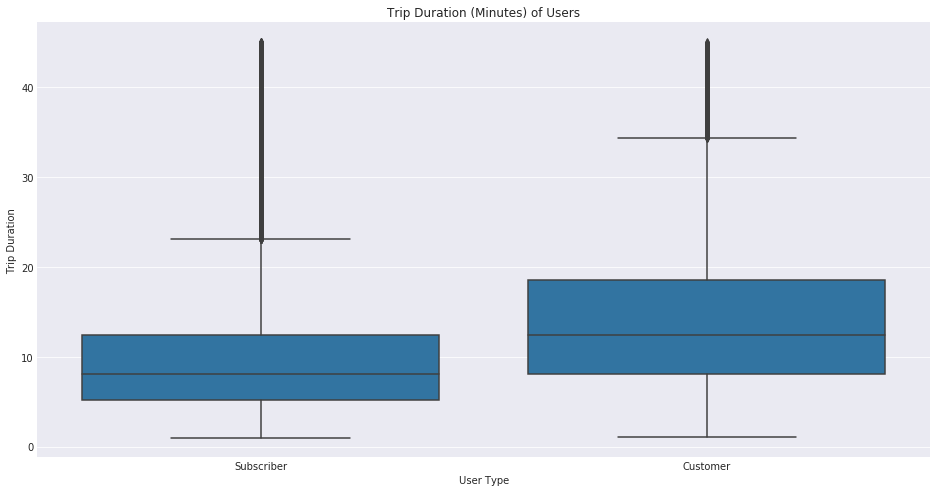

In [4]:
# Trip Duration in minutes vs User_type
df = df.query('duration_min < 45')
plt.figure(figsize = [16, 8])
# Categorical Plot on the right Boxplot
v_boxplot(df = df, x = 'user_type', y = 'duration_min');
setplot(title = "Trip Duration (Minutes) of Users", x_label = "User Type", 
        y_label = "Trip Duration", x_tick = None)

## (Distribution of days and hours)
Most active days were weekdays and Most active hours were an hour before or after a typical working day.

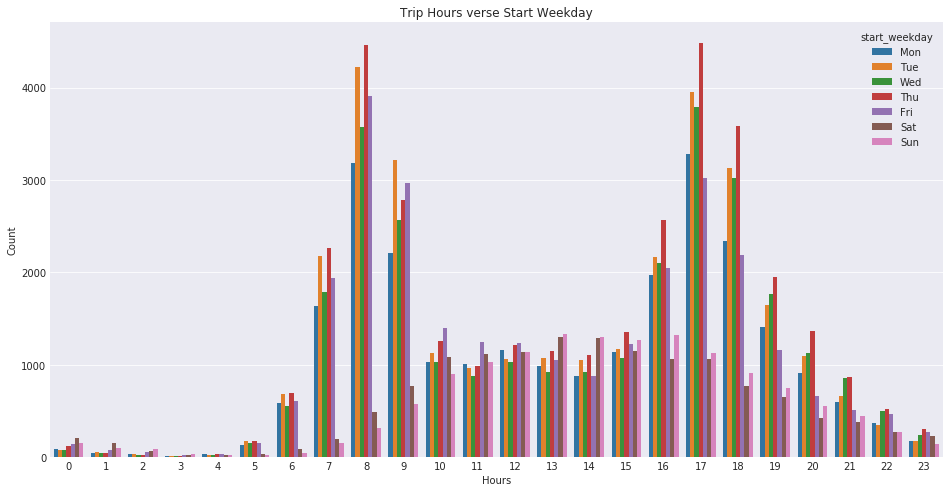

In [5]:
# Categorical Plot
plt.figure(figsize = [16, 8])
weekdays = ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
sb.set_style('darkgrid')
sb.countplot(data = df, x = 'start_hour', hue = 'start_weekday', hue_order = weekdays);
setplot(title = "Trip Hours verse Start Weekday", x_label = "Hours", y_label = "Count", x_tick = None)

## (Distribution of User Age)
Age distribution was most concentrated between 22 to 45 years old.

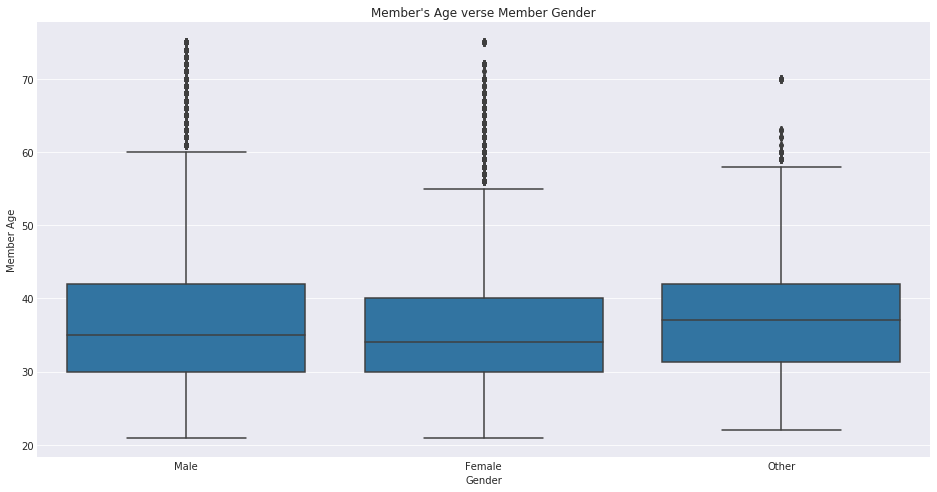

In [6]:
# Categorical Plot on the right Boxplot
plt.figure(figsize = [16, 8])
v_boxplot(df = df, x = 'member_gender', y = 'member_age')
setplot(title = "Member's Age verse Member Gender", x_label = "Gender", y_label = "Member Age", x_tick = None)

## (Distance Covered)
Interestingly, females on average spent more time on trips and covered more distance.

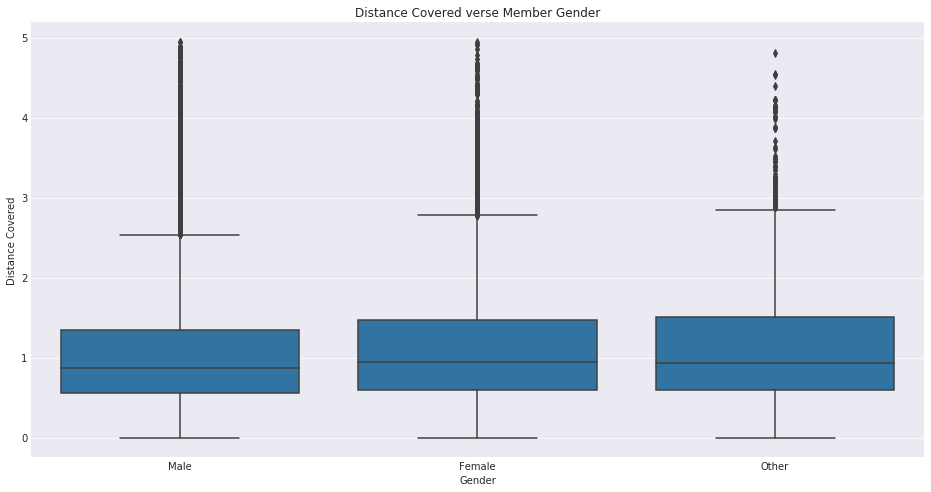

In [7]:
# Categorical Plot on the right Boxplot
plt.figure(figsize = [16, 8])
df_dist = df.query('distance_miles < 5')
v_boxplot(df = df_dist, x = 'member_gender', y = 'distance_miles')
setplot(title = "Distance Covered verse Member Gender", x_label = "Gender", 
        y_label = "Distance Covered", x_tick = None)

## (Bike Sharing)
No customer shared bikes on trips.

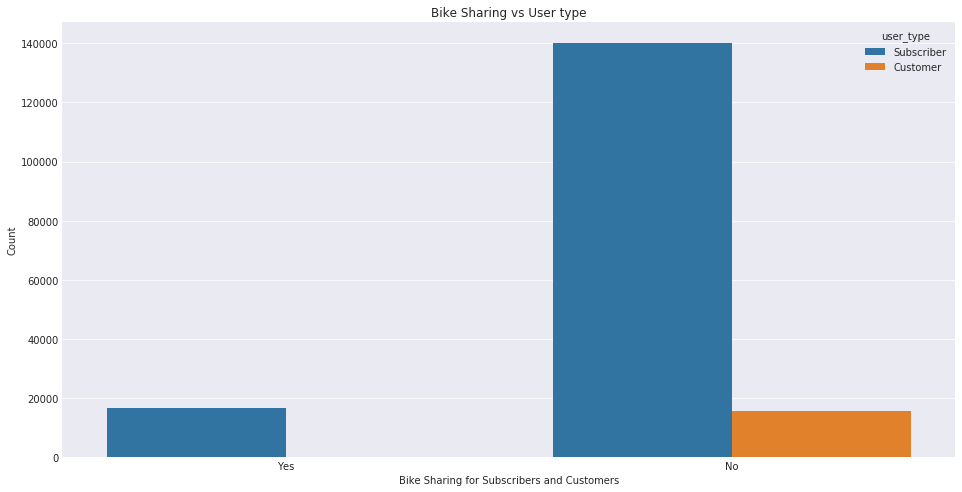

In [8]:
# Categorical Plot on the right Boxplot
plt.figure(figsize = [16, 8])
category_plot(df = df, x = 'bike_share_for_all_trip', hue = 'user_type', off = False)
setplot(title = "Bike Sharing vs User type", x_label = "Bike Sharing for Subscribers and Customers", 
        y_label = "Count", x_tick = None)

## (Distance Covered and Trip Duration)
There was a correlation between duration of trips and distance covered.

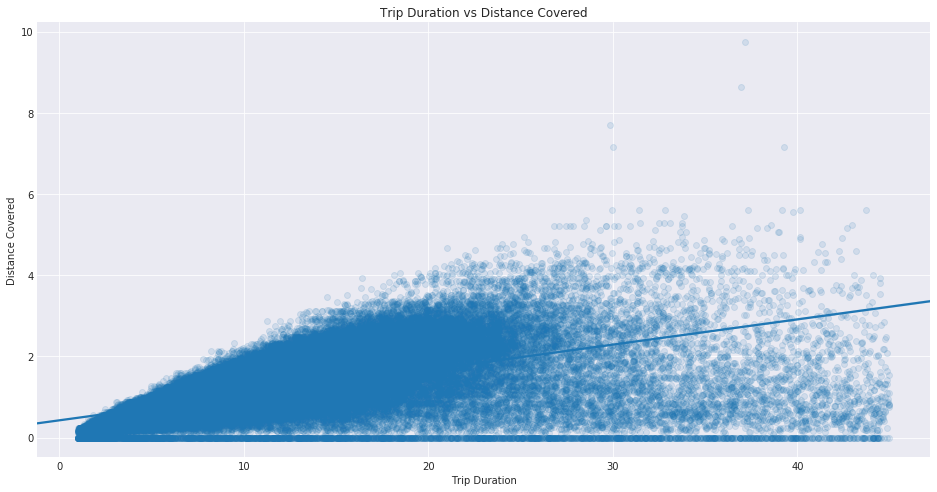

In [9]:
# Member Age vs Distance Covered
plt.figure(figsize = [16, 8])
# Scattered Plot of member_age vs distance covered
scatterplot(df = df, x = 'duration_min', y = 'distance_miles', fit_reg = True, alpha = 1/8)
setplot(title = "Trip Duration vs Distance Covered", x_label = 'Trip Duration', 
        y_label = 'Distance Covered', x_tick = None)

### Generate Slideshow
Once you're ready to generate your slideshow, use the `jupyter nbconvert` command to generate the HTML slide show.  

In [ ]:
# Use this command if you are running this file in local
!jupyter nbconvert Part_II_slide_deck.ipynb --to slides --post serve --no-input --no-prompt

[NbConvertApp] Converting notebook Part_II_slide_deck.ipynb to slides
[NbConvertApp] Writing 655262 bytes to Part_II_slide_deck.slides.html
[NbConvertApp] Redirecting reveal.js requests to https://cdnjs.cloudflare.com/ajax/libs/reveal.js/3.5.0
Serving your slides at http://127.0.0.1:8000/Part_II_slide_deck.slides.html
Use Control-C to stop this server
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: x-www-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: firefox: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: iceweasel: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: seamonkey: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: mozilla: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: epiphany: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: konqueror: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: chromium-browser: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: google-chrome: not found
/usr/bin/xdg-open: 778: /usr/bin/xdg-open: www-browser: not 

> In the classroom workspace, the generated HTML slideshow will be placed in the home folder. 

> In local machines, the command above should open a tab in your web browser where you can scroll through your presentation. Sub-slides can be accessed by pressing 'down' when viewing its parent slide. Make sure you remove all of the quote-formatted guide notes like this one before you finish your presentation! At last, you can stop the Kernel. 

### Submission
If you are using classroom workspace, you can choose from the following two ways of submission:

1. **Submit from the workspace**. Make sure you have removed the example project from the /home/workspace directory. You must submit the following files:
   - Part_I_notebook.ipynb
   - Part_I_notebook.html or pdf
   - Part_II_notebook.ipynb
   - Part_I_slides.html
   - README.md
   - dataset (optional)


2. **Submit a zip file on the last page of this project lesson**. In this case, open the Jupyter terminal and run the command below to generate a ZIP file. 
```bash
zip -r my_project.zip .
```
The command abobve will ZIP every file present in your /home/workspace directory. Next, you can download the zip to your local, and follow the instructions on the last page of this project lesson.
